### Instructions
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. 
In this dataset, the same participants answered questions in 2012 and again 2014.

1)  Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.  
2)  Did people become happier from 2012 to 2014? Compute results for each country in the sample.  
3)  Who reported watching more TV in 2012, men or women?  
4)  Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?  
5)  Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?  
6)  Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

There are 13 features including the target variable, partner.  A description of the features are summarized below. Otherwise, all features aside from country are numeric values.  Those with an asterisk (\*) are on a 0-10 scale, where 0 is the lowest value (i.e. you can't trust anyone) and 10 is the highest value (i.e. most people can be trusted).  A 77 is a refusal to answer, 88 means the respondent doesn't know, and 99 is no answer.  For the feature 'sclmeet', signified by two asterisks (\*\*), the values represent never meeting (1) to meeting everyday (7).  Finally, for 'sclact', signified by three asterisks (\*\*\*), the values correspond to much less than most (1) to much more than most (5), 7 is a refusal to answer, 8 means the respondent didn't know, and 9 means the respondent didn't answer.

| Feature | Description   |
|------|------|
|   cntry  | Country |
|   idno  | Identification number |
|   year  | 6 = 2012, 7 = 2014|
|   tvtot  | The total amount of time the respondent watches tv on a weekday (Mon - Fri)|
|   ppltrst *  | How much trust the respondent had in other people |
|   pplfair *  | How much the respondent gets taken advantage of |
|   pplhlp *  | If the respondent thinks people are helpful |
|   happy *  |How happy the respondent is |
|   sclmeet **  | How often the respondent meets with friends, relatives, or colleagues |
|   sclact \***  | If the respondent attends social activities more or less than others of the same age|
|   gndr  | Gender of the respondent |
|   agea  | Age of the respondent|
|   partner  | If the respondent has a partner or not|

In [264]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tabulate import tabulate

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import kruskal

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


There are missing values, but for the purpose of this exercise I will not impute them.  

In [4]:
print(tabulate([[col, df[col].isnull().sum()]for col in df.columns if df[col].isnull().sum() > 0], headers = ['Feature', 'Num Missing Rows']))

Feature      Num Missing Rows
---------  ------------------
tvtot                       8
ppltrst                    14
pplfair                    39
pplhlp                     25
happy                      31
sclmeet                    15
sclact                     94
gndr                       10
agea                      239
partner                    17


In [26]:
for i in df.columns:
    df = df[df[i].notnull()]

#### 1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
The year feature has two unique values, 6 and 7 which represent 2012 and 2014 respectively.  For readability, I will convert these to the actual year.  As for how much trust people have, they have a ranking from 0 to 10, where 0 signifies the user doesn't trust others and 10 means they think others are trustworthy.

In [38]:
df['year'].unique()

array([2012, 2014], dtype=int64)

In [36]:
def convert_year(col):
    if col == 6:
        return 2012
    else:
        return 2014

In [37]:
df['year'] = df['year'].apply(convert_year)

In [31]:
sorted(df['ppltrst'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

First I need to determine if the data is normal or not.  A visual way is to plot the histograms of the answers between the two years.  

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


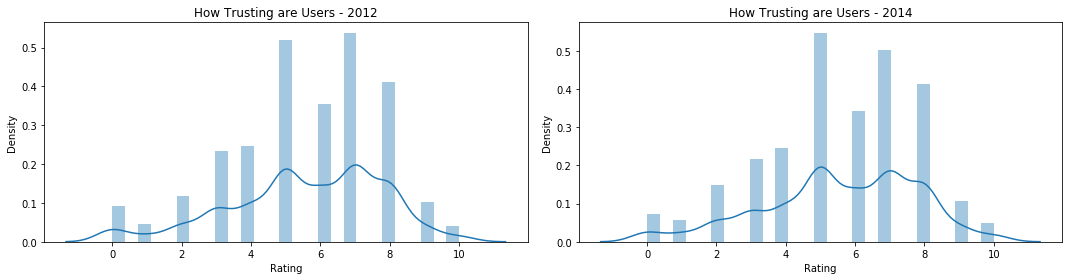

In [41]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.distplot(df[df['year']==2012]['ppltrst'], ax = axis1)
sns.distplot(df[df['year']==2014]['ppltrst'], ax = axis2)

axis1.set_title('How Trusting are Users - 2012')
axis2.set_title('How Trusting are Users - 2014')

for ax in [axis1, axis2]:
    ax.set_ylabel('Density')
    ax.set_xlabel('Rating')
    
plt.tight_layout()

For both years, it seems like there is a bit of a left skew.  Another visual plot to check for normality is the QQ plot. The QQ plots make it clear that these are Poisson distributions, not Gaussian.  A Shapiro-Wilk test confirms that this is not a Gaussian distribution (setting alpha to 0.05).  I will have to use non-parametric tests to answer the question.

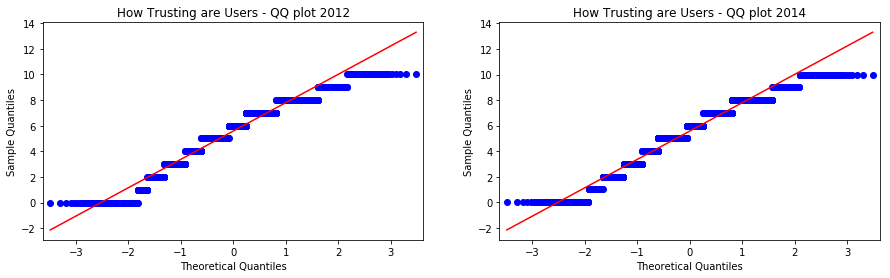

In [232]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

qqplot(df[df['year']==2012]['ppltrst'], line = 's', ax = axis1);
qqplot(df[df['year']==2014]['ppltrst'], line ='s', ax = axis2);

axis1.set_title('How Trusting are Users - QQ plot 2012')
axis2.set_title('How Trusting are Users - QQ plot 2014')

In [60]:
# Shapiro-Wilk Test
stat, p = shapiro(df[df['year']==2012]['ppltrst'])

In [59]:
alpha = 0.05

In [61]:
print(stat, p)
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

0.9520939588546753 1.4426241793085802e-34
Sample does not look Gaussian (reject H0)


To compare two dependent groups non-parametrically, I need to use the Wilcoxon signed-rank test.  The null hypothesis here is that there is no difference the trust levels of the survey takers between 2012 and 2014.  The p value is set to 0.05.  

In [216]:
for country in df['cntry'].unique():
    idno_lst = set(df[(df['cntry']==country) & (df['year']==2012)]['idno'].values).intersection(set(df[(df['cntry']==country) & (df['year']==2014)]['idno']))
    lst_2012 = []
    lst_2014 = []
    for idno in idno_lst:
        lst_2012.append(df[(df['idno']==idno) & (df['cntry']==country) & (df['year']==2012)]['ppltrst'].values[0])
        lst_2014.append(df[(df['idno']==idno) & (df['cntry']==country) & (df['year']==2014)]['ppltrst'].values[0])
    w, p = wilcoxon(x = lst_2012, y = lst_2014)
    print('For country {}, the w and p values are {} and {}'.format(country, w, p))
    if p < 0.05:
        print('The p-value is less than 0.05, reject the null hypothesis\n')
    else:
        print('the p-value is greater than 0.05, accept the null hypothesis\n')

For country CH, the w and p values are 88744.5 and 0.6870826298273109
the p-value is greater than 0.05, accept the null hypothesis

For country CZ, the w and p values are 61723.5 and 0.8390600771803833
the p-value is greater than 0.05, accept the null hypothesis

For country DE, the w and p values are 44.0 and 0.9157134600899863
the p-value is greater than 0.05, accept the null hypothesis

For country ES, the w and p values are 197976.0 and 0.03498230453843465
The p-value is less than 0.05, reject the null hypothesis

For country NO, the w and p values are 75026.5 and 0.6221446415196722
the p-value is greater than 0.05, accept the null hypothesis

For country SE, the w and p values are 104619.5 and 0.02061688328724722
The p-value is less than 0.05, reject the null hypothesis



**The countries that had respondents in both years are Switzerland (CH), Czech Republic (CZ), Germany (DE), Spain (ES), Norway (NO), and Sweden (SE).  The countries that had the same trust in people over the two years are Switzerland, Czech Republic, Germany, and Norway.  Those who's trust differed are Spain and Sweden.  **

#### 2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.
The method to solving this question is quite similar to question 1.  First I need to look at the histograms of happiness in 2012 and 2014.

The happiness scale is the same as the trustworthiness scale, in which respondents can pick a number between 0 and 10.  Based on the histograms, it seems people are generally happy!  In addition, knowing that this question is similar to the trustwortiness scale, I suspect this is also a Poisson distribution, which is confirmed by the QQ plot below.

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


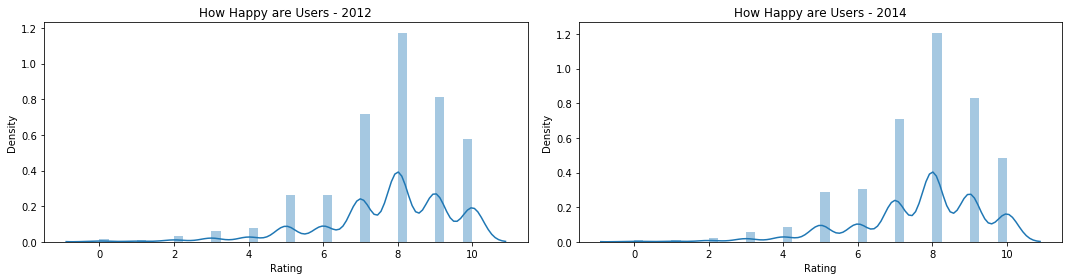

In [229]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.distplot(df[df['year']==2012]['happy'], ax = axis1)
sns.distplot(df[df['year']==2014]['happy'], ax = axis2)

axis1.set_title('How Happy are Users - 2012')
axis2.set_title('How Happy are Users - 2014')

for ax in [axis1, axis2]:
    ax.set_ylabel('Density')
    ax.set_xlabel('Rating')
    
plt.tight_layout()

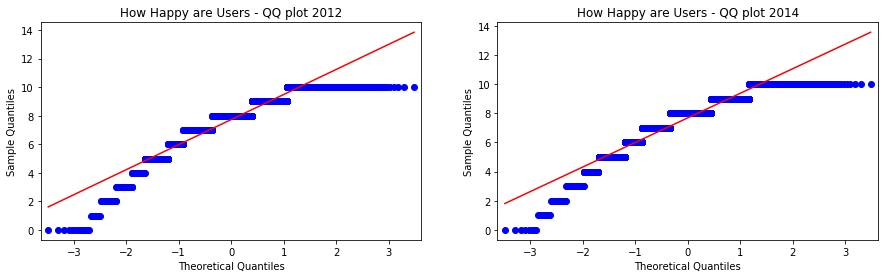

In [231]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

qqplot(df[df['year']==2012]['happy'], line = 's', ax = axis1);
qqplot(df[df['year']==2014]['happy'], liane ='s', ax = axis2);

axis1.set_title('How Happy are Users - QQ plot 2012')
axis2.set_title('How Happy are Users - QQ plot 2014')

Since this is testing the same group of people over a period of time and the distribution is not Gaussian, I will again employ the Wilcoxon method.  In this case, **all countries except Norway have the same happiness levels between 2012 and 2014.**

In [233]:
for country in df['cntry'].unique():
    idno_lst = set(df[(df['cntry']==country) & (df['year']==2012)]['idno'].values).intersection(set(df[(df['cntry']==country) & (df['year']==2014)]['idno']))
    lst_2012 = []
    lst_2014 = []
    for idno in idno_lst:
        lst_2012.append(df[(df['idno']==idno) & (df['cntry']==country) & (df['year']==2012)]['happy'].values[0])
        lst_2014.append(df[(df['idno']==idno) & (df['cntry']==country) & (df['year']==2014)]['happy'].values[0])
    w, p = wilcoxon(x = lst_2012, y = lst_2014)
    print('For country {}, the w and p values are {} and {}'.format(country, w, p))
    if p < 0.05:
        print('The p-value is less than 0.05, reject the null hypothesis\n')
    else:
        print('the p-value is greater than 0.05, accept the null hypothesis\n')

For country CH, the w and p values are 75726.5 and 0.7575607435639675
the p-value is greater than 0.05, accept the null hypothesis

For country CZ, the w and p values are 55932.0 and 0.22849644123659796
the p-value is greater than 0.05, accept the null hypothesis

For country DE, the w and p values are 16.0 and 0.2365019314807173
the p-value is greater than 0.05, accept the null hypothesis

For country ES, the w and p values are 190064.5 and 0.1573993272703731
the p-value is greater than 0.05, accept the null hypothesis

For country NO, the w and p values are 60547.0 and 1.4306917852645772e-05
The p-value is less than 0.05, reject the null hypothesis

For country SE, the w and p values are 103562.0 and 0.5895941229841813
the p-value is greater than 0.05, accept the null hypothesis



#### 3) Who reported watching more TV in 2012, men or women?
The gender feature has unique values of 1 and 2, which corresponds to male and female.  For ease of readability I'll convert it to the genders.

In [238]:
df['gndr'].unique()

array(['female', 'male'], dtype=object)

In [236]:
def convert_gender(col):
    if col == 1:
        return 'male'
    else:
        return 'female'

In [237]:
df['gndr'] = df['gndr'].apply(convert_gender)

The other thing to look at is what the tv viewing time looks like.  The data that is given to us is a range from 0-7, which makes it seem like those are the number of hours the survey taker watches tv during the weekday.  However, this assumption is incorrect and the numbers correspond to the following chart:

| Number | Hours   |
|------|------|
|   0  | 0 |
|   1  | 0 - 0.5 |
|   2  | 0.5 - 1|
|   3  | 1 - 1.5 |
|   4  | 1.5 - 2 |
|   5  | 2 - 2.5|
|   6  | 2.5 - 3 |
|   7  | > 3 |

I'll keep the tvtot feature as is, I just have to be careful when interpreting the results.  

In [240]:
sorted(df['tvtot'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

As always, the first thing I need to do is check if its a Gaussian distribution or not.  The histograms for male and female tv viewing times in 2012 shows that the two genders seem to watch the same amount of tv, but I will need to perform statistical analysis to confirm.  Since this is a Poisson distribution (as confirmed by the QQ plot), I need to use the Kruskal-Wallace test to check if they are significantly different or not.

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


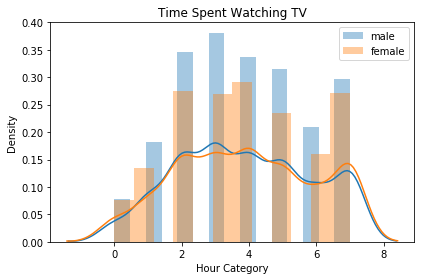

In [271]:
sns.distplot(df[(df['gndr']=='male') & (df['year']==2012)]['tvtot'], label = 'male')
sns.distplot(df[(df['gndr']=='female') & (df['year']==2012)]['tvtot'], label = 'female')

plt.legend(['male', 'female'])
plt.title('Time Spent Watching TV')

plt.ylabel('Density')
plt.xlabel('Hour Category')

plt.tight_layout()

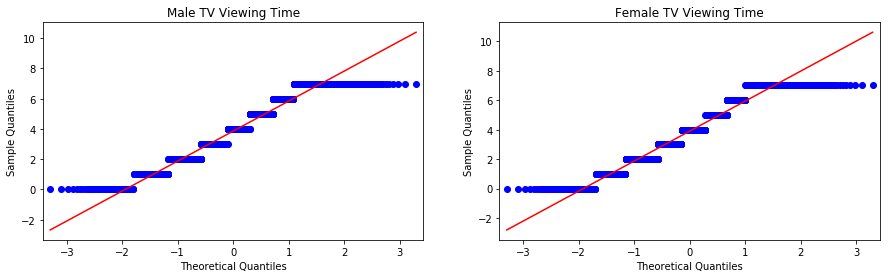

In [272]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

qqplot(df[(df['gndr']=='male') & (df['year']==2012)]['tvtot'], line = 's', ax = axis1);
qqplot(df[(df['gndr']=='female') & (df['year']==2012)]['tvtot'], line = 's', ax = axis2);

axis1.set_title('Male TV Viewing Time')
axis2.set_title('Female TV Viewing Time')

For the Kruskal Wallace test, I'll set the level of significance at 5%, with the null hypothesis being that there is no differnece in tv viewing times of males and females in 2012.  The test shows that there is a 43.3% chance of getting the data if there were no systemic differences between male and female tv viewing times, and **since the p-value is less than 0.05, the null hypothesis is accepted. The two genders watched around the same amount of tv in 2012.**  

In [278]:
stat, p = kruskal(df[(df['gndr']=='male') & (df['year']==2012)]['tvtot'], df[(df['gndr']=='female') & (df['year']==2012)]['tvtot'])
alpha =  0.05
print('The statistic and p-value are {} and {}'.format(stat, p))
if p > alpha:
    print('The p-value is greater than alpha, accept the null hypothesis')
else:
    print('The p-value is greater than alpha, reject the null hypothesis')

The statistic and p-value are 0.6145695087428265 and 0.4330724786171142
The p-value is greater than alpha, accept the null hypothesis


#### 4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
The partner feature has two values, 1 and 2, which corresponds to lives with a partner and does not live with a partner respectively, which I will convert for ease of readability.  The feature 'pplfair' is on a scale of 0 to 10, where 0 indicates the survey respondent thinks most people try to take advantage of them and and 10 indicates the respondent thinks most people try to be fair.

In [270]:
df['partner'].unique()

array(['partner', 'no partner'], dtype=object)

In [268]:
def convert_partner(col):
    if col == 1:
        return 'partner'
    else:
        return'no partner'

In [269]:
df['partner'] = df['partner'].apply(convert_partner)

In [266]:
sorted(df['pplfair'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

The histogram shows that the perception of fairness is about even between those with and without partners, but there is a large difference for rank 5.  Since this is a Poisson distribution with 2 independent groups, I will use the Kruskal-Wallace test to check if they are significantly different or not.  For this test, the null hypothesis is that there is no difference in perception of fairness between people with and without a partner in the year of 2012.  The alpha is set to 0.05.  **With a p-value of 0.0005, the null hypothesis is rejected and we can say that there is a difference in perception between those with and without partners in 2012. ** 

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


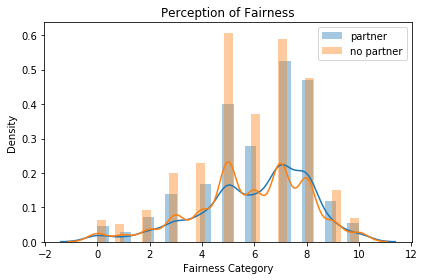

In [280]:
sns.distplot(df[(df['partner']=='partner') & (df['year']==2012)]['pplfair'], label = 'partner')
sns.distplot(df[(df['partner']=='no partner') & (df['year']==2012)]['pplfair'], label = 'no partner')

plt.legend(['partner', 'no partner'])
plt.title('Perception of Fairness')

plt.ylabel('Density')
plt.xlabel('Fairness Category')

plt.tight_layout()

In [283]:
stat, p = kruskal(df[(df['partner']=='partner') & (df['year']==2012)]['pplfair'], df[(df['partner']=='no partner') & (df['year']==2012)]['pplfair'])
alpha =  0.05
print('The statistic and p-value are {} and {}'.format(stat, p))
if p > alpha:
    print('The p-value is greater than alpha, accept the null hypothesis')
else:
    print('The p-value is greater than alpha, reject the null hypothesis')

The statistic and p-value are 11.887452362061 and 0.0005651336752494688
The p-value is greater than alpha, reject the null hypothesis


#### 5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?  
The feature 'sclmeet' describes how often the respondents met socially with friends, relatives or work colleagues.  The meaning of the numbers are summarized in the chart below:  

| Number | Number of Meetings   |
|------|------|
|   1  | Never |
|   2  | Less than once per month|
|   3  |Once per month |
|   4  | Several times per month |
|   5  |Once per week|
|   6  |Several times per week |
|   7  | Every day |

The 4 countries I will work with are Germany, Spain, Norway, and Sweden.

In [285]:
sorted(df['sclmeet'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [287]:
countries = ['DE', 'ES', 'NO', 'SE']

The histogram below shows the social distribution for each of my chosen countries in 2014.  The people in Norway and Sweden have similar social structures in that they are pretty social meeting several times per week or more.  Spain is similar but has a wider variance, in which they meet once per week or more.  Germany however is comparitavely not social, meeting several times a month.

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


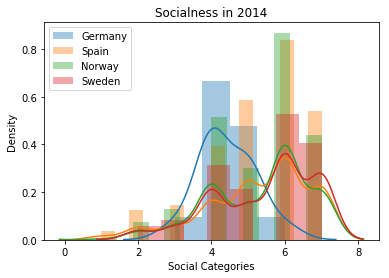

In [300]:
sns.distplot(df[(df['cntry'] == 'DE') & (df['year']==2014)]['sclmeet'], label = 'Germany')
sns.distplot(df[(df['cntry'] == 'ES') & (df['year']==2014)]['sclmeet'], label = 'Spain')
sns.distplot(df[(df['cntry'] == 'NO') & (df['year']==2014)]['sclmeet'], label = 'Norway')
sns.distplot(df[(df['cntry'] == 'SE') & (df['year']==2014)]['sclmeet'], label = 'Sweden')
plt.legend()

plt.title('Socialness in 2014')
plt.xlabel('Social Categories')
plt.ylabel('Density')

Since this is a Poisson distribution for 3 or more independent groups, I will have to use Kruskal-Wallace test.  The null hypothesis is that the socialness of the people in each country is the same for the year 2014, with the alpha set to 0.05.  When comparing all 4 countries, as expected **the null hypothesis is rejected and the people from these four countries do not have similar social habits.  **

In [303]:
stat, p = kruskal(df[(df['cntry'] == 'DE') & (df['year']==2014)]['sclmeet'],
                 df[(df['cntry'] == 'ES') & (df['year']==2014)]['sclmeet'],
                 df[(df['cntry'] == 'NO') & (df['year']==2014)]['sclmeet'],
                 df[(df['cntry'] == 'SE') & (df['year']==2014)]['sclmeet'])
alpha =  0.05
print('The statistic and p-value are {} and {}'.format(stat, p))
if p > alpha:
    print('The p-value is greater than alpha, accept the null hypothesis')
else:
    print('The p-value is greater than alpha, reject the null hypothesis')

The statistic and p-value are 16.66410763507818 and 0.000828527045724274
The p-value is greater than alpha, reject the null hypothesis


Suprisingly, the only combination where the null hypothesis is accepted is when comparing Spain and Norway.  

In [327]:
stat, p = kruskal(df[(df['cntry'] == 'ES') & (df['year']==2014)]['sclmeet'],
                 df[(df['cntry'] == 'NO') & (df['year']==2014)]['sclmeet'],
                 )
alpha =  0.05
print('The statistic and p-value are {} and {}'.format(stat, p))
if p > alpha:
    print('The p-value is greater than alpha, accept the null hypothesis')
else:
    print('The p-value is greater than alpha, reject the null hypothesis')

The statistic and p-value are 0.08857059859466035 and 0.7660022693409791
The p-value is greater than alpha, accept the null hypothesis


#### 6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
For the countries, I will choose the same ones as the previous question.  As for the feature 'sclact', the values range between 1 and 5 with the meanings of each ranking shown in the table below.

		
| Number | Number of Meetings   |
|------|------|
|   1  | Much less than most |
|   2  | Less than most|
|   3  |About the same |
|   4  | More than most |
|   4  | Much more than most |

From the histogram below the distribution for each country peaks at 3, where people believe they socialize about the same as others.  Germany has a slightly different distribution, with more people perceiving themselves as less social than others.  

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


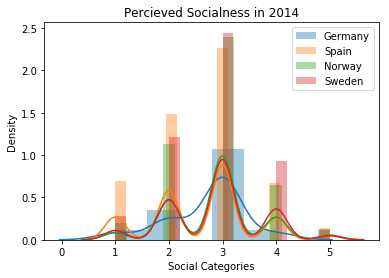

In [330]:
sns.distplot(df[(df['cntry'] == 'DE') & (df['year']==2014)]['sclact'], label = 'Germany')
sns.distplot(df[(df['cntry'] == 'ES') & (df['year']==2014)]['sclact'], label = 'Spain')
sns.distplot(df[(df['cntry'] == 'NO') & (df['year']==2014)]['sclact'], label = 'Norway')
sns.distplot(df[(df['cntry'] == 'SE') & (df['year']==2014)]['sclact'], label = 'Sweden')
plt.legend()

plt.title('Percieved Socialness in 2014')
plt.xlabel('Social Categories')
plt.ylabel('Density')

Since this is a Poisson distribution with 4 independent groups,  I will use the Kruskal-Wallace test.  The null hypothesis is that participants in all four countries had the same perceived socialness compared to others in their age group.  **With an alpha set to 0.05, the null hypothesis was rejected when comparing all four countries.**  

In [331]:
stat, p = kruskal(df[(df['cntry'] == 'DE') & (df['year']==2014)]['sclact'],
                 df[(df['cntry'] == 'ES') & (df['year']==2014)]['sclact'],
                 df[(df['cntry'] == 'NO') & (df['year']==2014)]['sclact'],
                 df[(df['cntry'] == 'SE') & (df['year']==2014)]['sclact'])
alpha =  0.05
print('The statistic and p-value are {} and {}'.format(stat, p))
if p > alpha:
    print('The p-value is greater than alpha, accept the null hypothesis')
else:
    print('The p-value is greater than alpha, reject the null hypothesis')

The statistic and p-value are 45.23657233322301 and 8.241167439059774e-10
The p-value is greater than alpha, reject the null hypothesis


The combination of countries in which the null hypothesis is accepted is Sweden and Norway.

In [335]:
stat, p = kruskal(df[(df['cntry'] == 'NO') & (df['year']==2014)]['sclact'],
                 df[(df['cntry'] == 'SE') & (df['year']==2014)]['sclact'])
alpha =  0.05
print('The statistic and p-value are {} and {}'.format(stat, p))
if p > alpha:
    print('The p-value is greater than alpha, accept the null hypothesis')
else:
    print('The p-value is greater than alpha, reject the null hypothesis')

The statistic and p-value are 0.4841005546644045 and 0.4865707813535519
The p-value is greater than alpha, accept the null hypothesis
